In [5]:
#import dependencies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import linregress
from datetime import datetime
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
import pickle

In [2]:
sales_df = pd.read_csv('final_reduced_data.csv')

In [4]:
sales_df = sales_df.rename(columns={'Date': 'ds', 'Sales': 'y'}).reset_index(drop=True)
sales_df = sales_df.sort_values('ds')
sales_df.tail(5)

,Store,DayOfWeek,ds,y,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Month,CompetitionDuration,PromoDuration,Sales_Lag_1,Sales_Lag_2,Sales_Rolling_Mean_3
78885,1098,5,2015-06-19,6174,775,1,0,0,1830,11,...,0,0,0,0,6,127,0,2776,4720,4556
78884,100,5,2015-06-19,8546,707,1,0,0,6880,9,...,0,0,0,0,6,21,0,8315,6796,7885
78883,436,5,2015-06-19,6068,654,1,0,0,2300,9,...,0,0,0,0,6,21,0,3713,4707,4829
78909,789,5,2015-06-19,3886,491,1,0,0,9770,7,...,1,0,0,0,6,143,0,3102,3792,3593
78965,4,5,2015-06-19,9686,1281,1,0,0,620,9,...,1,0,0,0,6,69,0,9374,9118,9392


In [6]:
MODEL_MAP = {
    4: "prophet_model_4.pkl",
    219: "prophet_model_219.pkl",
    676: "prophet_model_676.pkl",
    1066: "prophet_model_1066.pkl",
    1098: "prophet_model_1098.pkl",
}

In [7]:
def sales_prediction_prophet(Store_ID, sales_df, periods, horizon="120 days"):
    sales_df = sales_df[sales_df['Store'] == Store_ID]

    # Initialize and train Prophet
    model = Prophet(daily_seasonality=True, yearly_seasonality=True)
    model.fit(sales_df)

    # Save the trained model to a .pkl file
    model_filename = MODEL_MAP.get(Store_ID)
    if model_filename:
        with open(model_filename, 'wb') as f:
            pickle.dump(model, f)
        print(f"Saved model for Store {Store_ID} to {model_filename}")
    else:
        print(f"No filename found for Store {Store_ID}. Model not saved.")

    # Create future dataframe
    future = model.make_future_dataframe(periods=periods)  

    # Predict
    forecast = model.predict(future)
    
    # Plot the forecast
    fig = model.plot(forecast)
    fig2 = model.plot_components(forecast)

    # Cross-validation
    df_cv = cross_validation(model, initial='660 days', period='30 days', horizon=horizon)

    # Calculate performance metrics
    df_p = performance_metrics(df_cv)
    print(df_p[['horizon', 'mape']].head())
    
    # Calculate and print accuracy in terms of MAPE
    mape = df_p['mape'].mean() * 100
    accuracy = 100 - mape
    print(f"Accuracy (in terms of MAPE): {accuracy:.2f}%")

    # Plot the cross-validation forecast performance
    fig3 = plot_cross_validation_metric(df_cv, metric='mape')

14:00:18 - cmdstanpy - INFO - Chain [1] start processing
14:00:19 - cmdstanpy - INFO - Chain [1] done processing


Saved model for Store 4 to prophet_model_4.pkl


  0%|          | 0/4 [00:00<?, ?it/s]

14:00:20 - cmdstanpy - INFO - Chain [1] start processing
14:00:20 - cmdstanpy - INFO - Chain [1] done processing
14:00:20 - cmdstanpy - INFO - Chain [1] start processing
14:00:20 - cmdstanpy - INFO - Chain [1] done processing
14:00:21 - cmdstanpy - INFO - Chain [1] start processing
14:00:21 - cmdstanpy - INFO - Chain [1] done processing
14:00:21 - cmdstanpy - INFO - Chain [1] start processing
14:00:21 - cmdstanpy - INFO - Chain [1] done processing


  horizon      mape
0 13 days  0.160479
1 14 days  0.153540
2 15 days  0.126442
3 16 days  0.114868
4 17 days  0.112160
Accuracy (in terms of MAPE): 85.36%


14:00:22 - cmdstanpy - INFO - Chain [1] start processing
14:00:22 - cmdstanpy - INFO - Chain [1] done processing


Saved model for Store 219 to prophet_model_219.pkl


  0%|          | 0/4 [00:00<?, ?it/s]

14:00:23 - cmdstanpy - INFO - Chain [1] start processing
14:00:23 - cmdstanpy - INFO - Chain [1] done processing
14:00:24 - cmdstanpy - INFO - Chain [1] start processing
14:00:24 - cmdstanpy - INFO - Chain [1] done processing
14:00:24 - cmdstanpy - INFO - Chain [1] start processing
14:00:24 - cmdstanpy - INFO - Chain [1] done processing
14:00:24 - cmdstanpy - INFO - Chain [1] start processing
14:00:24 - cmdstanpy - INFO - Chain [1] done processing


  horizon      mape
0 13 days  0.151117
1 14 days  0.150296
2 15 days  0.135585
3 16 days  0.120844
4 17 days  0.126035
Accuracy (in terms of MAPE): 85.44%


14:00:25 - cmdstanpy - INFO - Chain [1] start processing
14:00:26 - cmdstanpy - INFO - Chain [1] done processing


Saved model for Store 676 to prophet_model_676.pkl


  0%|          | 0/4 [00:00<?, ?it/s]

14:00:27 - cmdstanpy - INFO - Chain [1] start processing
14:00:27 - cmdstanpy - INFO - Chain [1] done processing
14:00:27 - cmdstanpy - INFO - Chain [1] start processing
14:00:27 - cmdstanpy - INFO - Chain [1] done processing
14:00:28 - cmdstanpy - INFO - Chain [1] start processing
14:00:28 - cmdstanpy - INFO - Chain [1] done processing
14:00:28 - cmdstanpy - INFO - Chain [1] start processing
14:00:29 - cmdstanpy - INFO - Chain [1] done processing


  horizon      mape
0 12 days  0.104087
1 13 days  0.108503
2 14 days  0.111005
3 15 days  0.108300
4 16 days  0.105025
Accuracy (in terms of MAPE): 89.31%


14:00:29 - cmdstanpy - INFO - Chain [1] start processing
14:00:30 - cmdstanpy - INFO - Chain [1] done processing


Saved model for Store 1066 to prophet_model_1066.pkl


  0%|          | 0/4 [00:00<?, ?it/s]

14:00:31 - cmdstanpy - INFO - Chain [1] start processing
14:00:31 - cmdstanpy - INFO - Chain [1] done processing
14:00:31 - cmdstanpy - INFO - Chain [1] start processing
14:00:31 - cmdstanpy - INFO - Chain [1] done processing
14:00:31 - cmdstanpy - INFO - Chain [1] start processing
14:00:31 - cmdstanpy - INFO - Chain [1] done processing
14:00:31 - cmdstanpy - INFO - Chain [1] start processing
14:00:32 - cmdstanpy - INFO - Chain [1] done processing


  horizon      mape
0 13 days  0.156898
1 14 days  0.154860
2 15 days  0.145596
3 16 days  0.140471
4 17 days  0.135136
Accuracy (in terms of MAPE): 88.09%


14:00:32 - cmdstanpy - INFO - Chain [1] start processing
14:00:32 - cmdstanpy - INFO - Chain [1] done processing


Saved model for Store 1098 to prophet_model_1098.pkl


  0%|          | 0/4 [00:00<?, ?it/s]

14:00:33 - cmdstanpy - INFO - Chain [1] start processing
14:00:33 - cmdstanpy - INFO - Chain [1] done processing
14:00:34 - cmdstanpy - INFO - Chain [1] start processing
14:00:34 - cmdstanpy - INFO - Chain [1] done processing
14:00:34 - cmdstanpy - INFO - Chain [1] start processing
14:00:34 - cmdstanpy - INFO - Chain [1] done processing
14:00:34 - cmdstanpy - INFO - Chain [1] start processing
14:00:35 - cmdstanpy - INFO - Chain [1] done processing


  horizon      mape
0 13 days  0.177055
1 14 days  0.178751
2 15 days  0.153225
3 16 days  0.143959
4 17 days  0.143254
Accuracy (in terms of MAPE): 84.70%


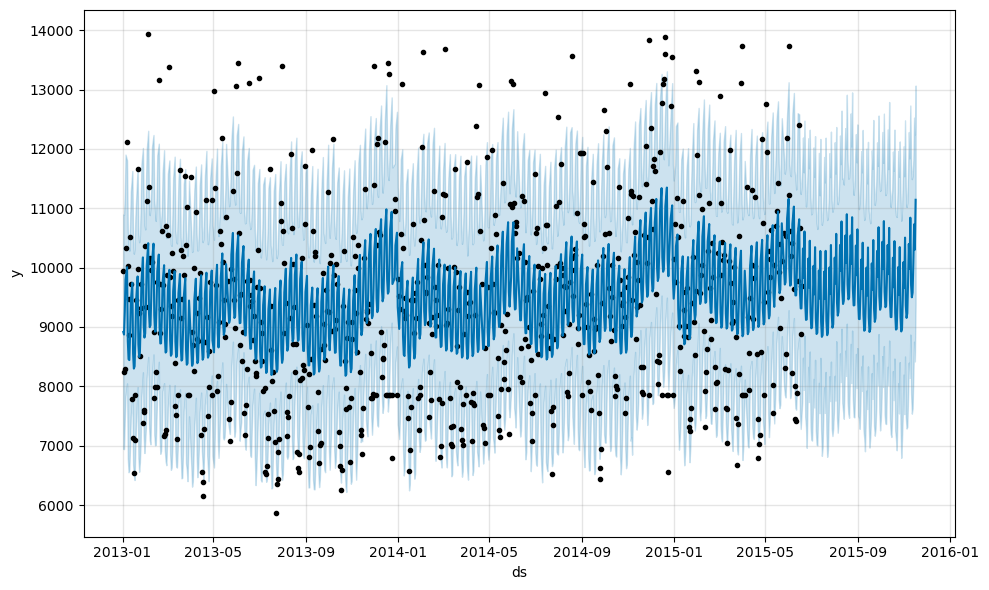

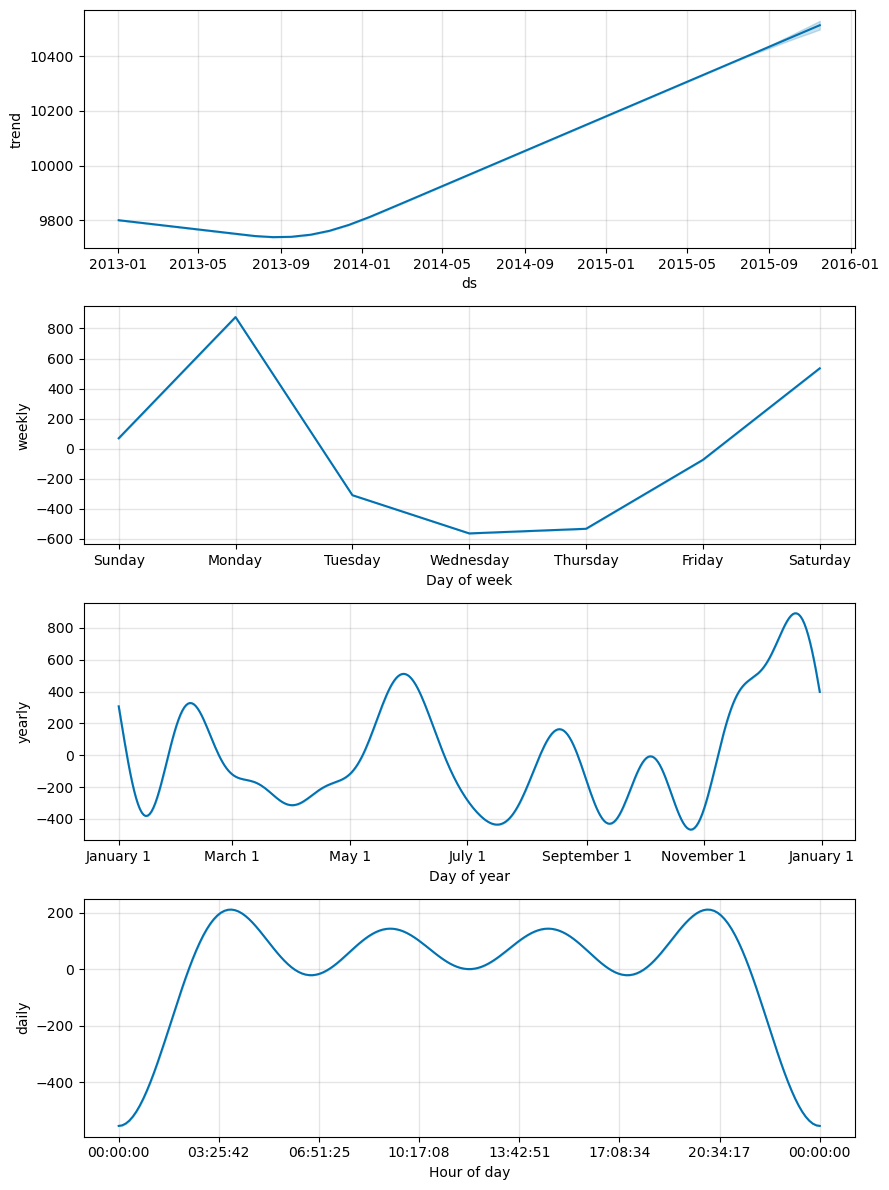

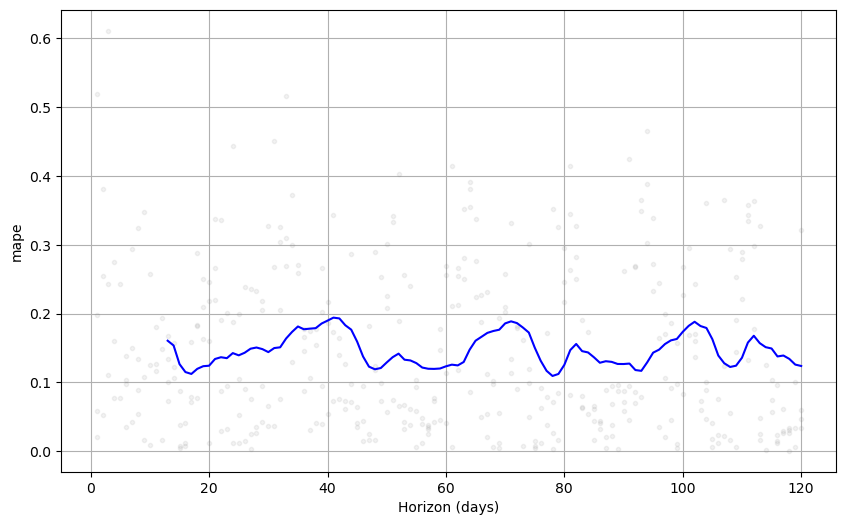

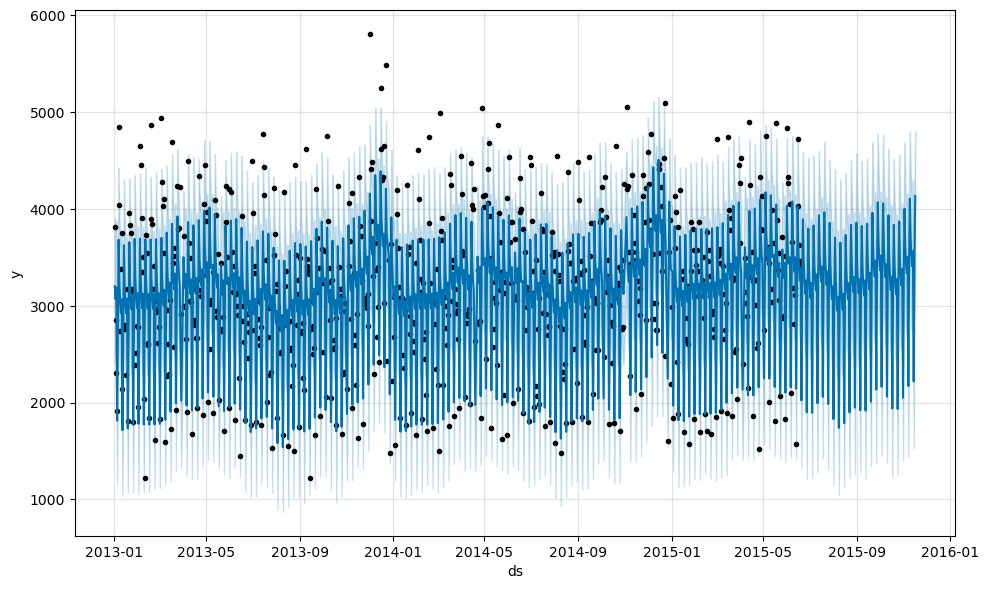

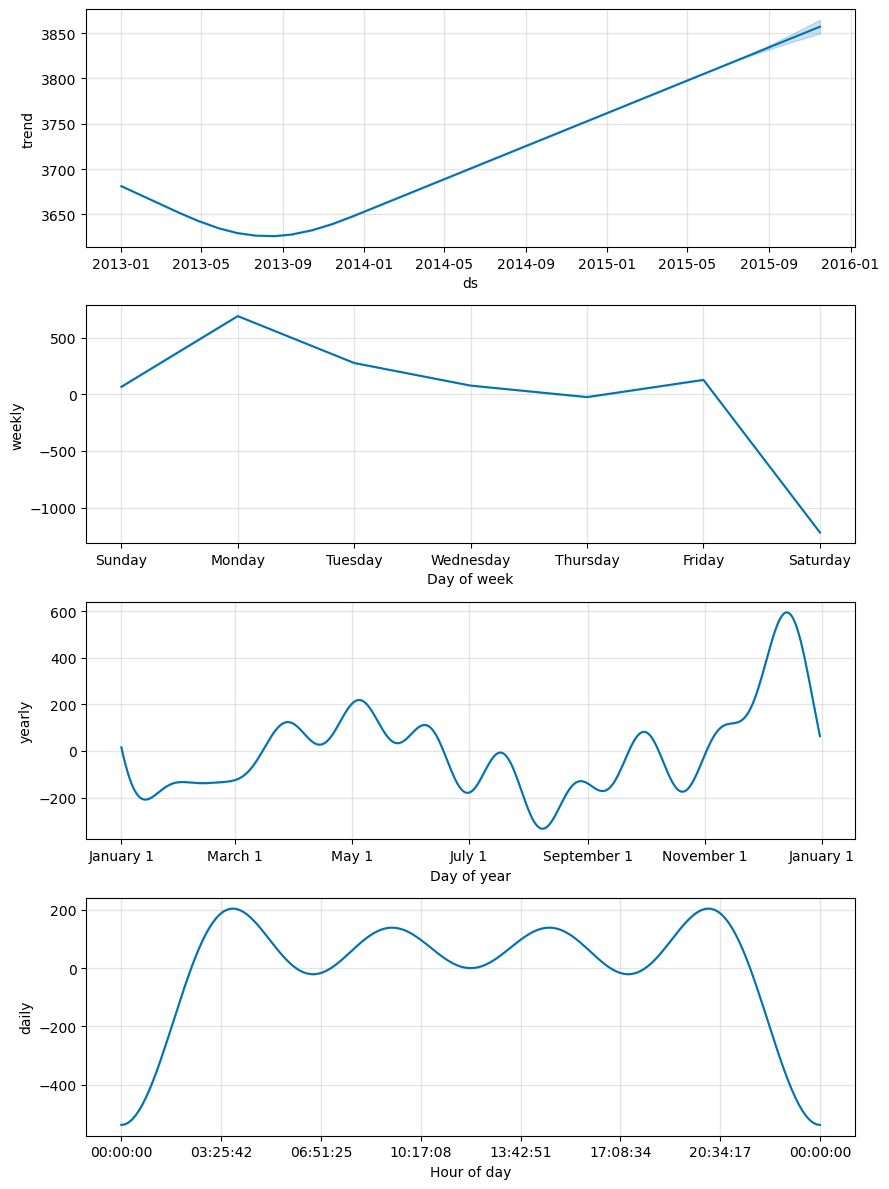

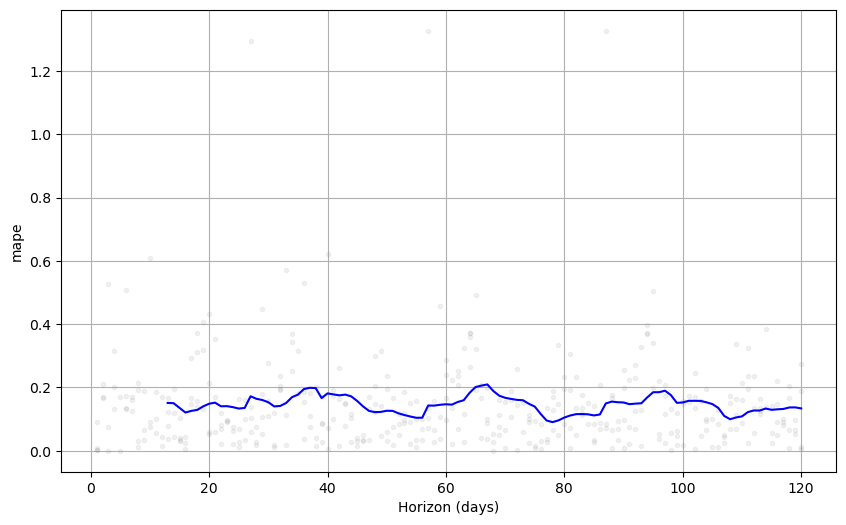

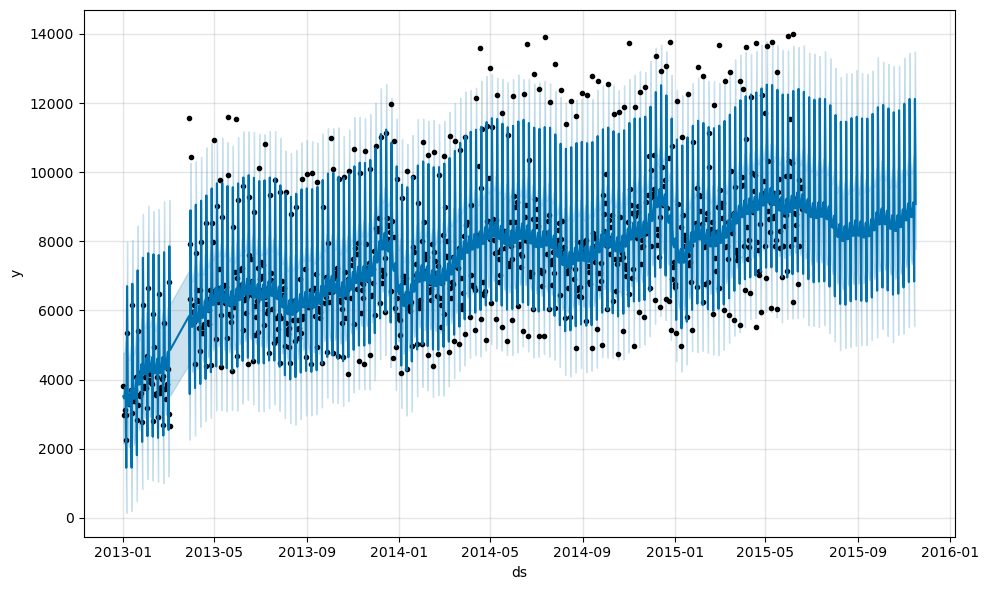

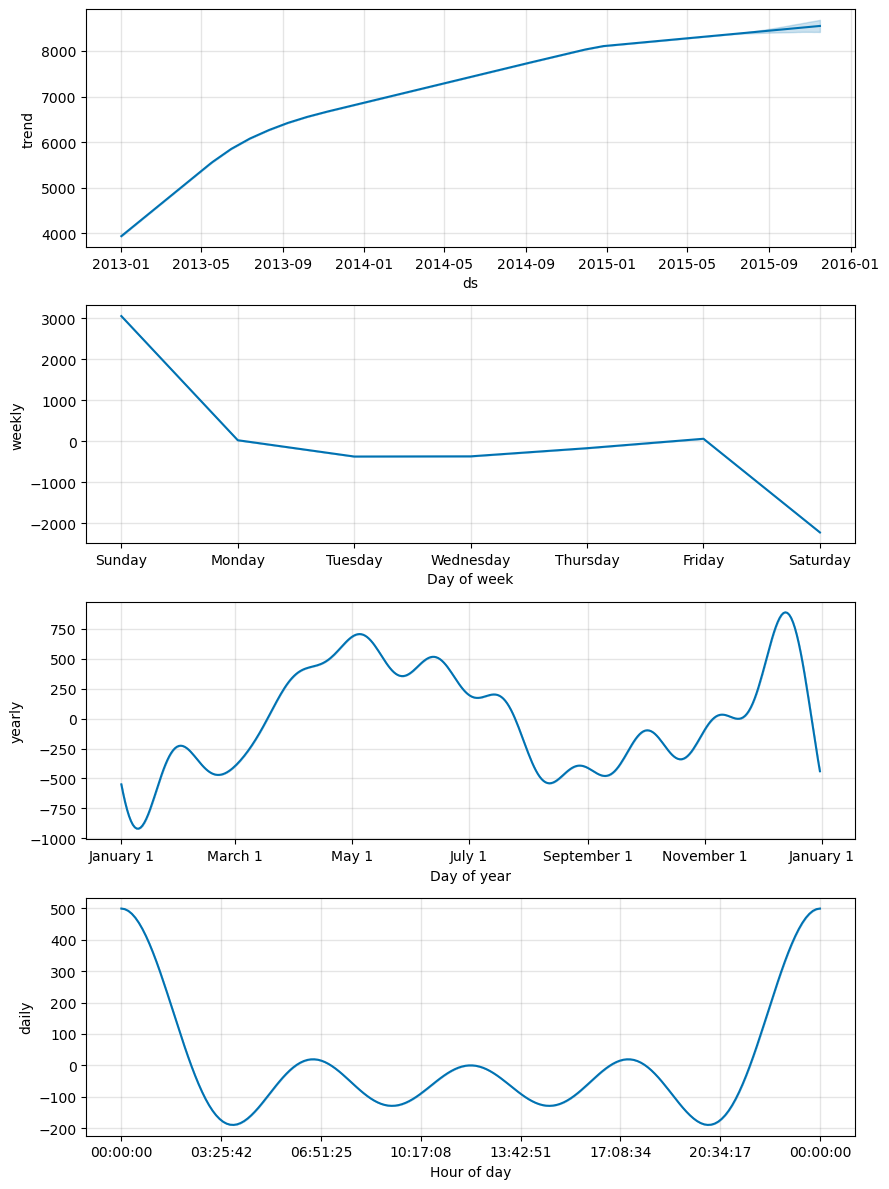

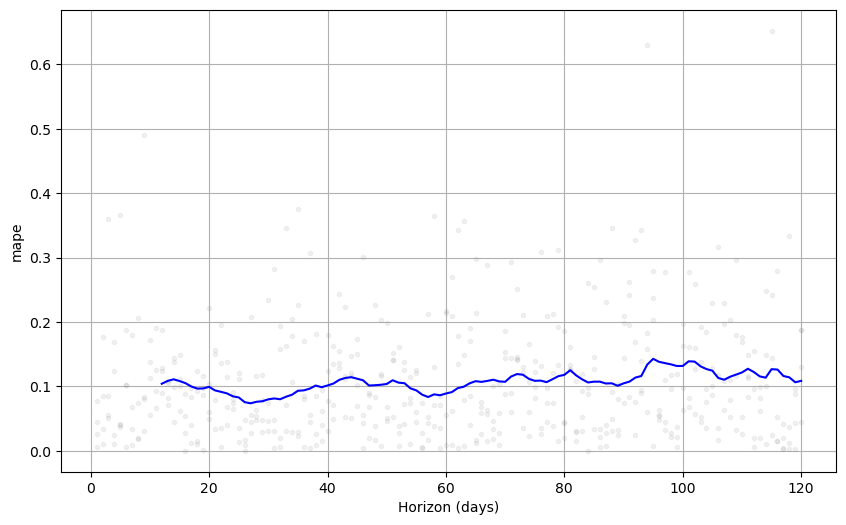

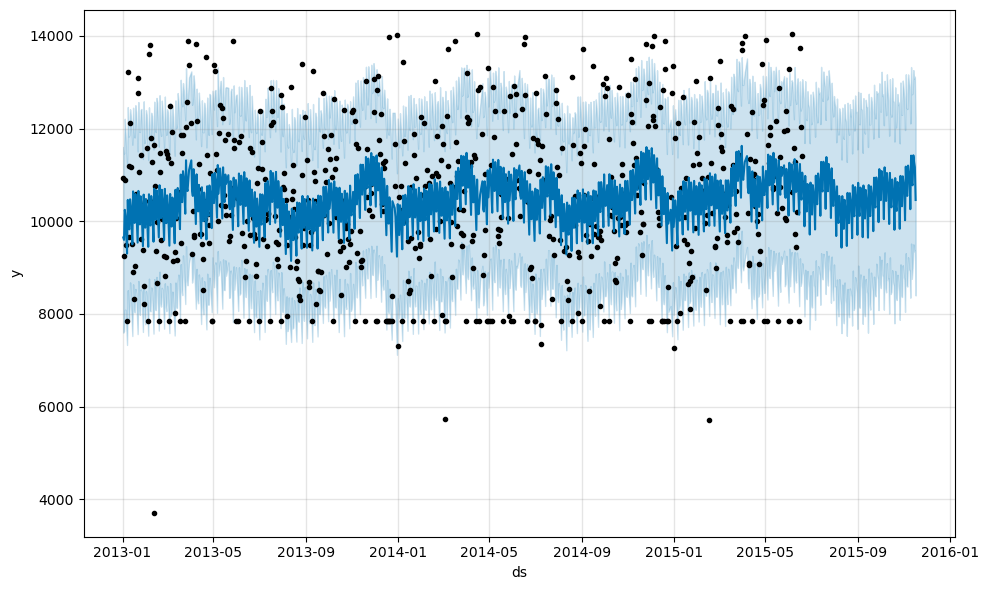

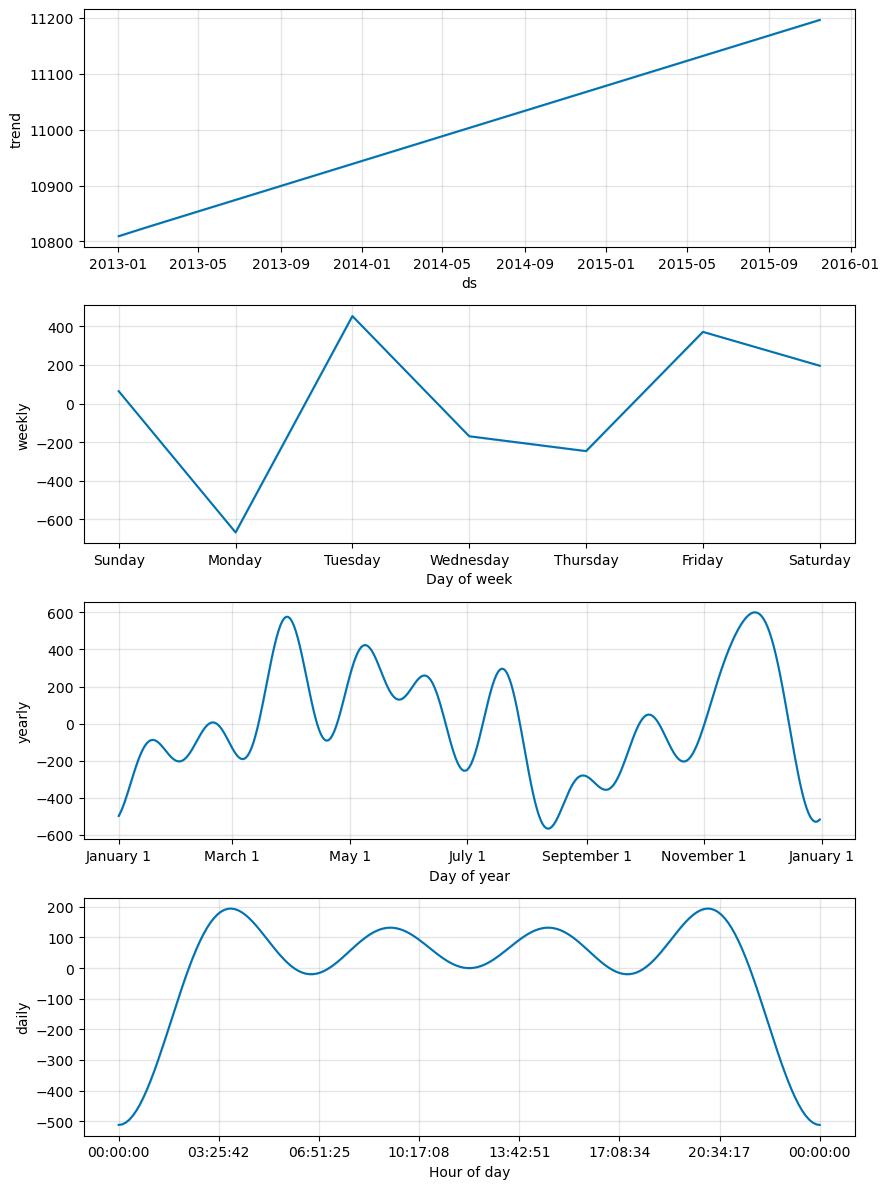

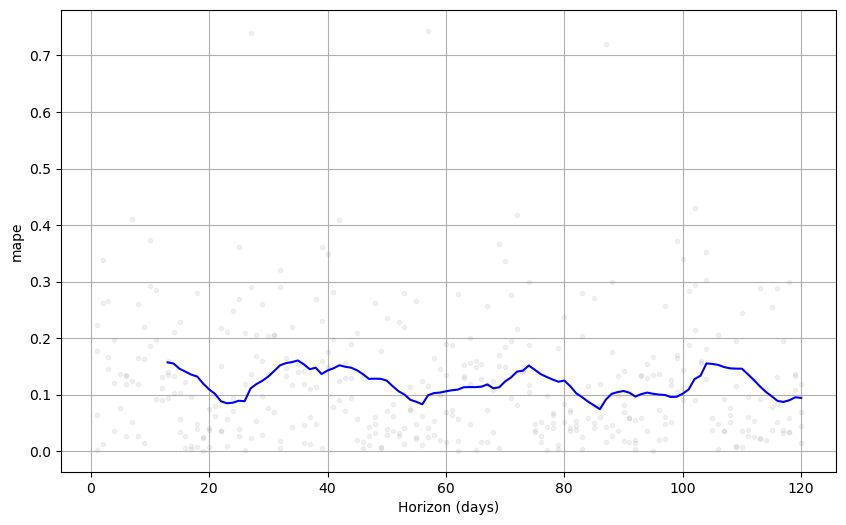

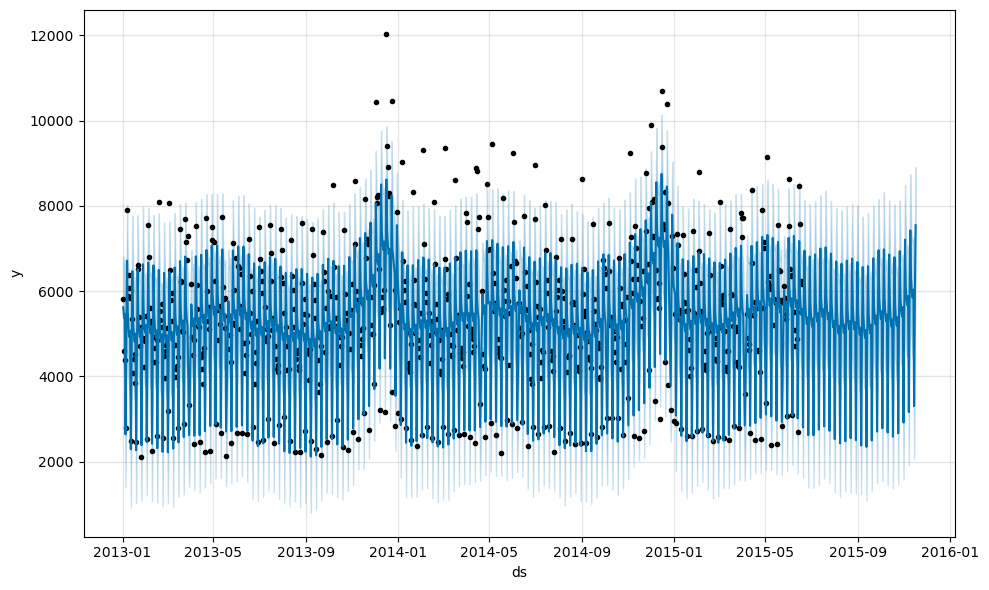

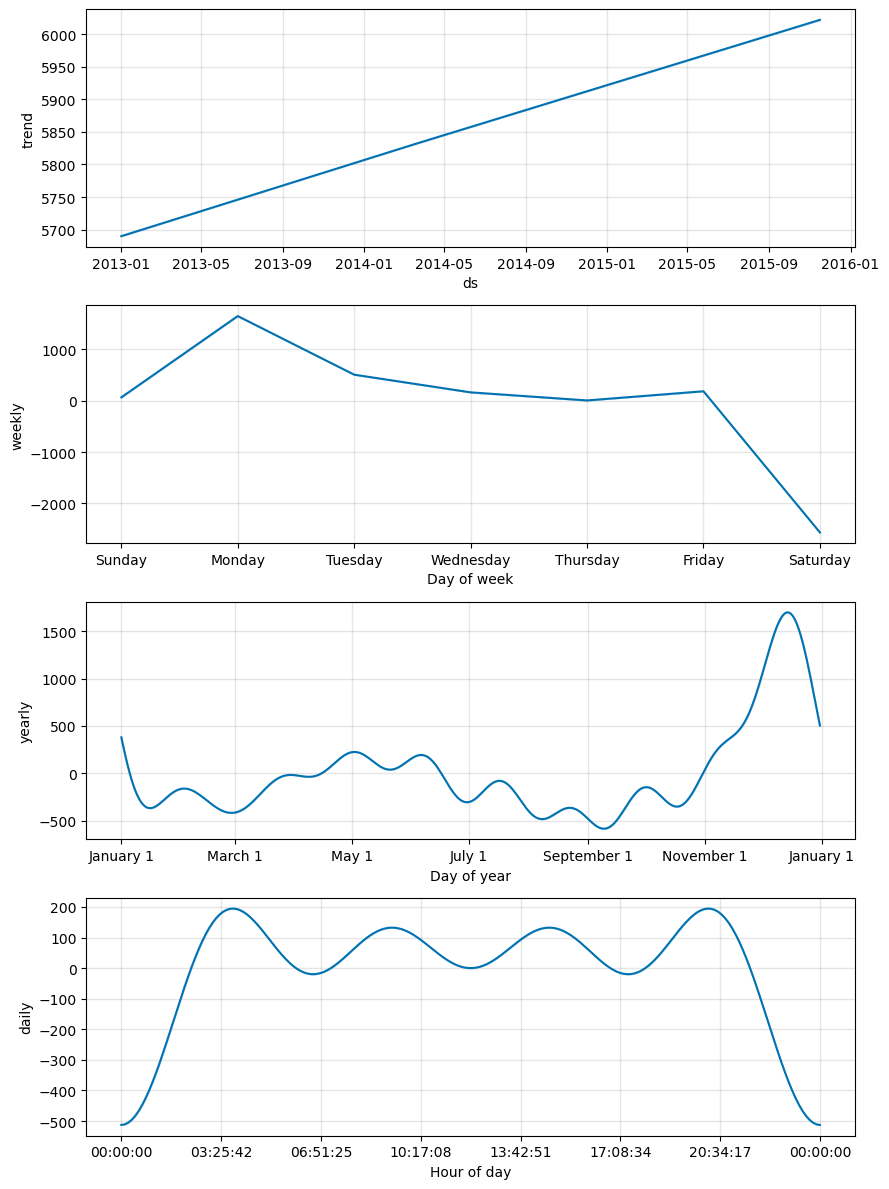

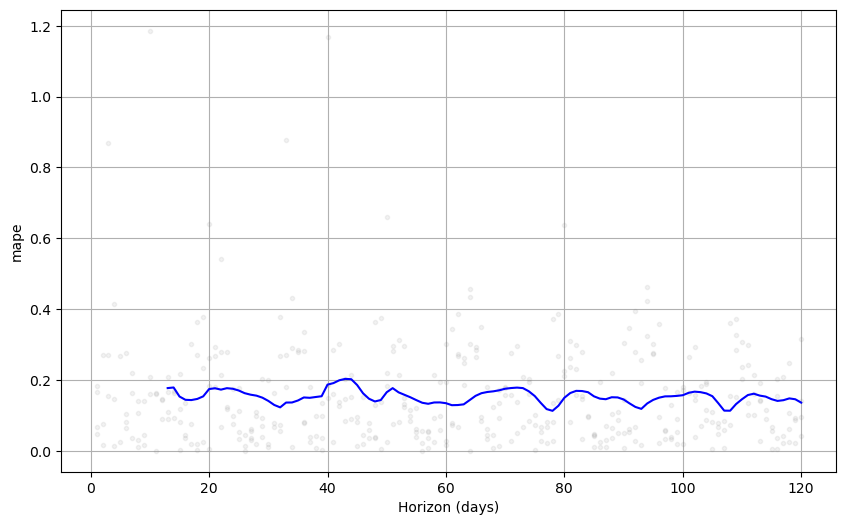

In [8]:
store_ids = [4, 219, 676, 1066, 1098]
for store_id in store_ids:
    sales_prediction_prophet(store_id, sales_df, 150)

In [9]:
with open("prophet_model_4.pkl", 'rb') as f:
    model = pickle.load(f)

print(type(model))

<class 'prophet.forecaster.Prophet'>


The file prophet_model_4.pkl for Store 4 has data.
The file prophet_model_219.pkl for Store 219 has data.
The file prophet_model_676.pkl for Store 676 has data.
The file prophet_model_1066.pkl for Store 1066 has data.
The file prophet_model_1098.pkl for Store 1098 has data.
